In [11]:
pip install torch

     |████████████████████████████████| 133.8 MB 2.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from __future__ import division
import sys
import argparse
import numpy as np
import pretty_midi
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import datetime
import os

In [4]:
"""
Read data from dataset root path
1. For each composer read midi file
2. Get piano roll matrix out of midi file
3. Creates dataset of [name, piano roll matrix, path]
"""

root=os.getcwd()+'/musicnet_midis'
data=[]
for path, subdirs, files in os.walk(root):
    sub_dir_str=path.split('/')[-1]
    for name in files:
        sample_path=os.path.join(path, name)
        sample_name=sub_dir_str + '_' + name.split('.')[0]
        try:
            piano_roll_matrix = pretty_midi.PrettyMIDI(sample_path).get_piano_roll(100)
            data.append([sample_name, piano_roll_matrix, sample_path])
        except:
            print('could not read {}'.format(sample_name))
    print('Finito_{}'.format(sub_dir_str))
data_pd=pd.DataFrame(data)

Finito_musicnet_midis
Finito_Mozart


/Users/drado/opt/anaconda3/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Finito_Ravel
Finito_Dvorak
Finito_Beethoven
Finito_Haydn
Finito_Schubert
Finito_Cambini
could not read Bach_2310_prelude15
could not read Bach_2292_prelude19
could not read Bach_2227_fugue6
could not read Bach_2211_fugue12
could not read Bach_2305_prelude14
could not read Bach_2230_prelude20
could not read Bach_2194_prelude13
Finito_Bach
Finito_Brahms
Finito_Faure


In [5]:
data_pd.head(3)

,0,1,2
0,Mozart_1828_k542_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",/Users/drado/GitCode/Portfolio/GAN/ClassicalMu...
1,Mozart_1893_k564_3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",/Users/drado/GitCode/Portfolio/GAN/ClassicalMu...
2,Mozart_1817_k3752,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",/Users/drado/GitCode/Portfolio/GAN/ClassicalMu...


In [7]:
fsr = 100 #midi sampling frequency
def plot_piano_roll(m, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    midi_data=pretty_midi.PrettyMIDI(m[2])
    librosa.display.specshow(midi_data.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))
    plt.title(m[0])
    plt.figure(figsize=(8, 4))

/Users/drado/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  return f(*args, **kwargs)


'0:02:32.690000'

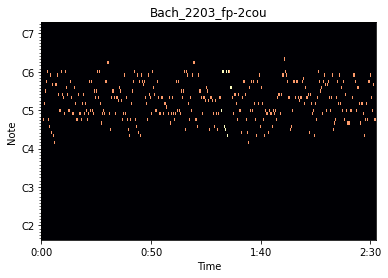

<Figure size 576x288 with 0 Axes>

In [8]:
#Get one random sample, plot it's piano roll matrix.
random_m_idx=np.random.randint(0, high=data_pd.shape[0], size=None, dtype=int)
random_m=data_pd.iloc[random_m_idx]
plot_piano_roll(random_m,32,100)
random_m[0]
len_sec=random_m[1].shape[1]/fsr
str(datetime.timedelta(seconds=len_sec))

In [48]:
x=data_pd.iloc[:,1][5][:,500:744]
torch.

In [46]:
#Create dataset class
class MyDataset():
  def __init__(self,dataframe):  
    self.data=dataframe.iloc[:,1]
    self.names=dataframe.iloc[:,0]
 
  def __len__(self):
    return len(self.data)
   
  def __getitem__(self,idx):
    return torch.self.data[idx][:,500:744]


In [47]:
dataset=MyDataset(data_pd)

(128, 25370)